<a href="https://colab.research.google.com/github/umjiwoo/ubion_hackathon/blob/main/TRAIN_PREPROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# df_origin = pd.read_csv("./Data/application_data.csv")
# df_origin.head(3)

df_origin = pd.read_csv("/content/drive/MyDrive/ubion/application_data.csv")

In [4]:
# 원본 복구를 위해 copy()해놓음
# df로 작업하고 원본과 비교 필요 시 df_origin으로 확인

df = df_origin.copy()

print(df.shape)
df.info(verbose=True, null_counts=True)

(307511, 122)


<ipython-input-4-f6a93444bd52>:7: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

### 안 쓰는 컬럼 삭제

In [5]:
# 컬럼명 지정해서 삭제하기 전(column index 순서 바뀌기 전) column index로 뭉텅이 삭제

# EXT_SOURCE 1~3 -> 의미파악불가
col_drop1 = df_origin.columns[41:44]
df.drop(col_drop1, axis=1, inplace=True)

# 주거 관련 columns  -> 의미파악불가 
col_drop2 = df_origin.columns[44:95]
df.drop(col_drop2, axis=1, inplace=True)

# FLAG_DOCUMENT_2~21 -> 의미파악 불가 
col_drop3 = df_origin.columns[96:116]
df.drop(col_drop3, axis=1, inplace=True)

In [6]:
df.drop(['SK_ID_CURR', 
         'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE',
         'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
         'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
         'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY' ], axis=1, inplace=True)

### OCCUPATION_TYPE 이상치 삭제

In [7]:
df.drop((df.loc[(df['DAYS_EMPLOYED'] > 0)&(df['OCCUPATION_TYPE']=='Cleaning staff')].index),axis=0,inplace=True)

## df.drop((df.loc[(df['DAYS_EMPLOYED'] > 0) & (df['ORGANIZATION_TYPE'] == "XNA")& (df['OCCUPATION_TYPE']=="Cleaning staff")])

#   df['OCCUPATION_TYPE'] 결측치에서 df['DAYS_EMPLOYED'] > 0) & (df['ORGANIZATION_TYPE'] == 'XNA') 인 사람들 'Unemployed' 로 바꿀건데
#   df['DAYS_EMPLOYED'] > 0 인 사람들이랑 df['ORGANIZATION_TYPE'] == 'XNA' 사람들 같은 사람들이라서 바꿀 때 하나만 조건으로 해도 됨

In [8]:
# 이상치 삭제 잘 됐는지 확인
len(df.loc[(df['DAYS_EMPLOYED'] > 0 )& (df['OCCUPATION_TYPE']=="Cleaning staff")])

0

#### 결측치 대체

In [9]:
# 결측치 0으로 대체
df['OCCUPATION_TYPE'].fillna(0,inplace=True)

In [10]:
# DAYS_EMPLOYED 가 양수이면서 OCCUPATION_TYPE 이 nan이었던 데이터에 대해 Unemployed로 대체
df.loc[(df['DAYS_EMPLOYED'] > 0)&(df['OCCUPATION_TYPE']==0),'OCCUPATION_TYPE']='Unemployed'

In [11]:
print(f"occu 전체 개수 : {len(df['OCCUPATION_TYPE'])}")
print(f"미응답 데이터 개수 : {len(df.loc[(df['OCCUPATION_TYPE']==0)])}")
print(f"미응답 데이터 삭제 후 개수 : {len(df['OCCUPATION_TYPE']) - len(df.loc[(df['OCCUPATION_TYPE']==0)])}")

occu 전체 개수 : 307509
미응답 데이터 개수 : 41019
미응답 데이터 삭제 후 개수 : 266490


In [12]:
df.drop((df.loc[(df['OCCUPATION_TYPE']==0)].index),axis=0,inplace=True)
len(df)

266490

In [13]:
df['DAYS_EMPLOYED'] = np.where(df['DAYS_EMPLOYED'] <= 0, -(df['DAYS_EMPLOYED'])+1, 0)

In [14]:
# ORGANIZATION_TYPE XNA를 No_organization 으로 변경
df['ORGANIZATION_TYPE'] = np.where(df['ORGANIZATION_TYPE'] == 'XNA', 'No_organization', df['ORGANIZATION_TYPE'])

#### ORGANIZATION_TYPE 1~n 데이터 묶기

In [15]:
#같은 유형끼리 type 묶기 - 진행 중
# df['ORGANIZATION_TYPE'].value_counts().sort_index()
num = 1

while True:
    df.loc[df["ORGANIZATION_TYPE"]==f"Transport: type {num}","ORGANIZATION_TYPE"]="Transport"
    num += 1

    if num == 6:
        break

In [16]:
num = 1

while True:
    df.loc[df["ORGANIZATION_TYPE"]==f"Trade: type {num}","ORGANIZATION_TYPE"]="Trade"
    num += 1

    if num == 9:
        break

In [17]:
num = 1

while True:
    df.loc[df["ORGANIZATION_TYPE"]==f"Business Entity Type {num}","ORGANIZATION_TYPE"]="Business Entity"
    num += 1

    if num == 5:
        break

In [18]:
num = 1

while True:
    df.loc[df["ORGANIZATION_TYPE"]==f"Industry: type {num}","ORGANIZATION_TYPE"]="Industry"
    num += 1

    if num == 15:
        break

### 데이터 삭제

In [19]:
# CODE_GENDER XNA데이터(4개) 삭제
df.drop(df.loc[df["CODE_GENDER"]=="XNA"].index, axis=0, inplace=True)

In [20]:
# DAYS_LAST_PHONE_CHANGE 결측치(1개) 삭제
df.drop(df.loc[df["DAYS_LAST_PHONE_CHANGE"].isna()].index, axis=0, inplace=True)

In [21]:
# 나이(DAYS_BIRTH)보다 거주일수(DAYS_REGISTRATION)가 많은 경우 삭제
df.drop(df.loc[(-df["DAYS_REGISTRATION"] > -df["DAYS_BIRTH"])].index, axis=0, inplace=True)

In [22]:
# AMT_ANNUITY 결측치(12개) 삭제
df.drop(df.loc[df["AMT_ANNUITY"].isna()].index, axis=0, inplace=True)
df.loc[df["AMT_ANNUITY"].isna()]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [23]:
# AMT_GOODS_PRICE 결측치(276개) 삭제
df.drop(df.loc[df["AMT_GOODS_PRICE"].isna()].index, axis=0, inplace=True)
df.loc[df["AMT_GOODS_PRICE"].isna()]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


### 단위 변환

In [24]:
# DAYS_LAST_PHONE_CHANGE 양수 및 년단위 변환
df["DAYS_LAST_PHONE_CHANGE"] = df["DAYS_LAST_PHONE_CHANGE"].apply(lambda x:(-x)/365)

# DAYS_REGISTRATION 양수 및 년단위 변환
df["DAYS_REGISTRATION"] = df["DAYS_REGISTRATION"].apply(lambda x:(-x)/365)

# DAYS_BIRTH 양수 및 년단위 변환
df["DAYS_BIRTH"] = df["DAYS_BIRTH"].apply(lambda x:(-x)/365)

# DAYS_ID_PUBLISH 양수 및 년단위 변환
df["DAYS_ID_PUBLISH"] = df["DAYS_ID_PUBLISH"].apply(lambda x:(-x)/365)

In [25]:
# 화폐 단위 변환
df["AMT_INCOME_TOTAL"] = df["AMT_INCOME_TOTAL"].apply(lambda x:int(x*16.08))
df["AMT_INCOME_TOTAL"]

0         3256199
1         4341600
2         1085400
3         2170800
4         1953719
           ...   
307506    2532599
307507    1157759
307508    2460239
307509    2749679
307510    2532599
Name: AMT_INCOME_TOTAL, Length: 266236, dtype: int64

### (직관적으로 보이는)이상치 삭제 및 대체

In [26]:
# OWN_CAR_AGE이 60 이상인 값 삭제
df.drop(df.loc[df["OWN_CAR_AGE"]>= 60].index, axis=0, inplace=True)


# 결측치 -> '차 없음' 으로 판단해서 결측치 외 모든 값+1
# df.loc[df["OWN_CAR_AGE"]== 0] #2134개
df["OWN_CAR_AGE"] = df["OWN_CAR_AGE"].apply(lambda x:x+1)


# 차량연식 결측치는 0으로 대체
df["OWN_CAR_AGE"].fillna(0, inplace=True)
df["OWN_CAR_AGE"]


# 정수로 바꾸기
df['OWN_CAR_AGE'] = df['OWN_CAR_AGE'].astype(int)

#### 중앙값, 최빈값 대체

In [27]:
### 문의 횟수 데이터
# 최빈값(0)으로 대체 <- 대부분 0이 70~80%이었음
AMT = ["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT"]
for col in AMT:
  print(df[col].isna().sum())
  mode_1 = df[col].mode()[0]
  df[col].fillna(mode_1,inplace=True)
  print(df[col].isna().sum())

35627
0
35627
0
35627
0
35627
0
35627
0


In [28]:
# 중앙값으로 대체 <- 0에 분포가 많이 되어있으므로 
print(df['AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum())
median = df['AMT_REQ_CREDIT_BUREAU_YEAR'].median()
print(median)
df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(median,inplace=True)
print(df['AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum())

35627
1.0
0


#### 년단위 변경 컬럼 정수화

In [29]:
# 정수로 바꾸기
float_int = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY' ,'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for col in float_int:
    print(df[col].dtype)
    df[col] = df[col].astype(int)
    print(df[col].dtype)

float64
int64
float64
int64
float64
int64
float64
int64
float64
int64
float64
int64


### 파생변수 생성

In [30]:
df["DAYS_ID_PUBLISH_int"] = df["DAYS_ID_PUBLISH"].apply(lambda x:int(x))
df["DAYS_BIRTH_int"] = df["DAYS_BIRTH"].apply(lambda x:int(x))
df["DAYS_REGISTRATION_int"] = df["DAYS_REGISTRATION"].apply(lambda x:int(x))
df["DAYS_LAST_PHONE_CHANGE_int"] = df["DAYS_LAST_PHONE_CHANGE"].apply(lambda x:int(x))

In [31]:
# 나이대 변환
df['DAYS_BIRTH_int_n0s']=""
df.loc[(df['DAYS_BIRTH_int']>=20) & (df['DAYS_BIRTH_int'] <30),"DAYS_BIRTH_int_n0s"]="20s"
df.loc[(df['DAYS_BIRTH_int']>=30) & (df['DAYS_BIRTH_int'] <40),"DAYS_BIRTH_int_n0s"]="30s"
df.loc[(df['DAYS_BIRTH_int']>=40) & (df['DAYS_BIRTH_int'] <50),"DAYS_BIRTH_int_n0s"]="40s"
df.loc[(df['DAYS_BIRTH_int']>=50) & (df['DAYS_BIRTH_int'] <60),"DAYS_BIRTH_int_n0s"]="50s"
df.loc[(df['DAYS_BIRTH_int']>=60),"DAYS_BIRTH_int_n0s"]="60s"

In [32]:
# 신분증발급연차 정수로
df["DAYS_ID_PUBLISH_int"] = df["DAYS_ID_PUBLISH"].apply(lambda x:int(x))

# 나이를 정수로
df["DAYS_BIRTH_int"] = df["DAYS_BIRTH"].apply(lambda x:int(x))

# 전입 연차 정수로
df["DAYS_REGISTRATION_int"] = df["DAYS_REGISTRATION"].apply(lambda x:int(x))

In [33]:
# HOUR_APPR_PROCESS_START에서 9-16시 & 그외시간 , 이진분류 파생변수컬럼 생성 =>Is_Business_hours
df['Is_Business_hours']=3
df.loc[(df['HOUR_APPR_PROCESS_START']>=9) | (df['HOUR_APPR_PROCESS_START'] < 17),"Is_Business_hours"]=1
df.loc[df['HOUR_APPR_PROCESS_START']>=17,"Is_Business_hours"]=0
# df['Is_Business_hours'].value_counts()
df["Is_Business_hours"]

0         1
1         1
2         1
3         0
4         1
         ..
307506    1
307507    1
307508    1
307509    1
307510    0
Name: Is_Business_hours, Length: 263392, dtype: int64

### 정수형으로 바꾼 데이터 원본 일자 컬럼 삭제

In [34]:
# 'DAYS_ID_PUBLISH', 'DAYS_BIRTH', 'DAYS_REGISTRATION', DAYS_LAST_PHONE_CHANGE 삭제
df.drop(['DAYS_ID_PUBLISH', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE'], axis=1, inplace=True)

### 인코딩

In [35]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import category_encoders as ce

#### 원핫

In [37]:
print(len(df.columns))
onehot =df[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH_int_n0s','WEEKDAY_APPR_PROCESS_START']]

# encoder = OneHotEncoder(sparse=False)
# df_1hot = encoder.fit_transform(onehot)
# df_1hot

df_1hot = pd.get_dummies(data = onehot)

38


In [38]:
df.drop(onehot, axis=1, inplace=True)
print(len(df.columns))
df = pd.concat([df, df_1hot], axis=1)
print(len(df.columns))

31
56


#### 바이너리

In [39]:
binary = ['NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'HOUR_APPR_PROCESS_START', 'NAME_INCOME_TYPE']
df = ce.BinaryEncoder(cols = binary).fit_transform(df)
print(df.columns)
# 이전꺼 보기 inverse_transform(X_in인데 이거는 array-like, shape = [n_samples, n_features])

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE_0',
       'NAME_TYPE_SUITE_1', 'NAME_TYPE_SUITE_2', 'NAME_TYPE_SUITE_3',
       'NAME_INCOME_TYPE_0', 'NAME_INCOME_TYPE_1', 'NAME_INCOME_TYPE_2',
       'NAME_INCOME_TYPE_3', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE_0',
       'NAME_HOUSING_TYPE_1', 'NAME_HOUSING_TYPE_2',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'OWN_CAR_AGE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE_0', 'OCCUPATION_TYPE_1',
       'OCCUPATION_TYPE_2', 'OCCUPATION_TYPE_3', 'OCCUPATION_TYPE_4',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START_0',
       'HOUR_APPR_PROCESS_START_1', 'HOUR_APPR_PROCESS_START_2',
       'HOUR_APPR_PROCESS_START_3', 'HOUR_APPR_PROCESS_START_4',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE_0', 'ORGANIZATION_TYPE_1', 'ORGANIZATION_TYPE_2',
       'ORGANIZATION_TYPE_3', 'ORGANIZATION_TYPE_4', 'ORGANIZATION_TYPE_5',
 

#### 라벨

In [40]:
edu = df['NAME_EDUCATION_TYPE']
le = LabelEncoder()
le.fit(edu)
label_encoded = le.transform(edu)
label_encoded_1 = pd.Series(label_encoded +1)

dict_ = {'Lower secondary':1, 'Secondary / secondary special':2,'Incomplete higher':3, 'Higher education':4,'Academic degree':5}
# Lower secondary: 중등, Secondary / secondary special: 고등, Incomplete higher: 대학교 중퇴, Higher education: 학사, Academic degree: 석사 이상
df['NAME_EDUCATION_TYPE'] = df.NAME_EDUCATION_TYPE.map(dict_)

### Train / Test 분리 후 수행 - Train 에 대해서만

#### train_test_split()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
y = df["TARGET"]
X = df.drop("TARGET", axis=1)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
# 가구원 수 6이상인 값 5로 대체
X_train['CNT_FAM_MEMBERS'] = np.where(X_train['CNT_FAM_MEMBERS'] >= 6, 5, X_train['CNT_FAM_MEMBERS'])

### 이상치 확인 함수 - outliers_iqr()

In [45]:
## 이상치의 값들을 출력하는 함수
## 매개변수는 2개 데이터프레임, 컬럼의 이름, iqr 배수
def outliers_iqr(df, col,t):
    ## 1사분위수, 3사분위수 변수에 대입
    quartile_1, quartile_3 = np.percentile(df[col], [25, 75]) #25프로, 75프로
    ## iqr 값을 대입
    iqr = quartile_3 - quartile_1
    ## 하단 경계 값, 상단 경계 값
    lower_whis = quartile_1 - (t*iqr)
    upper_whis = quartile_3 + (t*iqr)
    
    ## 데이터프레임에서 상단의 경계보다 크거나 하단의 경계보다 작은 데이터를 출력
    outliers = df[(df[col] > upper_whis) | (df[col] < lower_whis)]
    outliers = outliers[[col]]
    
    outlier_percent = str(round(len(outliers)/len(df)*100,2))

    title = f"{col} boxplot\n\n lower : {lower_whis} \n upper : {upper_whis} \n outlier_count : {len(outliers)} \n outlier percentage : {outlier_percent}%\n"

    return [title,df[col]]

### 이상치 박스플롯 그리기 함수 - draw_boxplot()

In [46]:
def draw_boxplot(col_list,t):
    box_plot_datas = []

    for col in col_list:
        data = outliers_iqr(df, col,t)
        box_plot_datas.append(data)

    plt.figure(figsize=(15,30))

    for i in range(1,len(col_list)+1):
        plt.subplot(len(col_list)//3 + 1,3,i)
        plt.title(box_plot_datas[i-1][0])
        plt.boxplot(box_plot_datas[i-1][1])

    plt.tight_layout(pad=3)
    plt.show()

### 이상치 삭제 함수 - drop_outliers()

In [47]:
## 이상치 삭제 함수
## 매개변수는 3개 데이터프레임, 컬럼의 이름, iqr 계수
def drop_outliers(df, col, t):
    ## 1사분위수, 3사분위수 변수에 대입
    quartile_1, quartile_3 = np.percentile(df[col], [25, 75]) #25프로, 75프로
    ## iqr 값을 대입
    iqr = quartile_3 - quartile_1
    ## 하단 경계 값, 상단 경계 값
    lower_whis = quartile_1 - (t*iqr)
    upper_whis = quartile_3 + (t*iqr)
    
    ## 데이터프레임에서 상단의 경계보다 크거나 하단의 경계보다 작은 데이터를 출력
    outliers = df[(df[col] > upper_whis) | (df[col] < lower_whis)]
    outliers = outliers[[col]]

    df.drop(index=outliers.index, axis=0, inplace=True)
    
    return df

#### 이상치 삭제

> AMT_INCOME_TOTAL → 2991 Row 제거 iqr배수3
> REGION_POPULATION_RELATIVE→ 2.74%(8337개) Row 제거 iqr배수1.7
> AMT_REQ_CREDIT_BREAU_QRT  → row 2행 제거 (≥ 19) iqr배수1.7

In [48]:
# REGION_POPULATION_RELATIVE 제거 행 수 : 8337
X_train = drop_outliers(X_train,"REGION_POPULATION_RELATIVE",1.7)

In [49]:
# AMT_REQ_CREDIT_BUREAU_QRT 19이상인 데이터 삭제 - 2개
X_train.drop(index = X_train.loc[X_train["AMT_REQ_CREDIT_BUREAU_QRT"]>=19].index, axis=0,inplace=True)

In [50]:
# AMT_INCOME_TOTAL 제거 행 수 : 2447
X_train = drop_outliers(X_train,"AMT_INCOME_TOTAL",3)

##### X_test에 대해 수행

In [51]:
# REGION_POPULATION_RELATIVE 제거 행 수 : 8337
X_test = drop_outliers(X_test,"REGION_POPULATION_RELATIVE",1.7)

In [52]:
# AMT_REQ_CREDIT_BUREAU_QRT 19이상인 데이터 삭제 - 2개
X_test.drop(index = X_test.loc[X_test["AMT_REQ_CREDIT_BUREAU_QRT"]>=19].index, axis=0,inplace=True)

In [53]:
# AMT_INCOME_TOTAL 제거 행 수 : 2447
X_test = drop_outliers(X_test,"AMT_INCOME_TOTAL",3)

### 이상치 제거 후 박스플롯 그려보기

#### 이상치 정보 뜨게

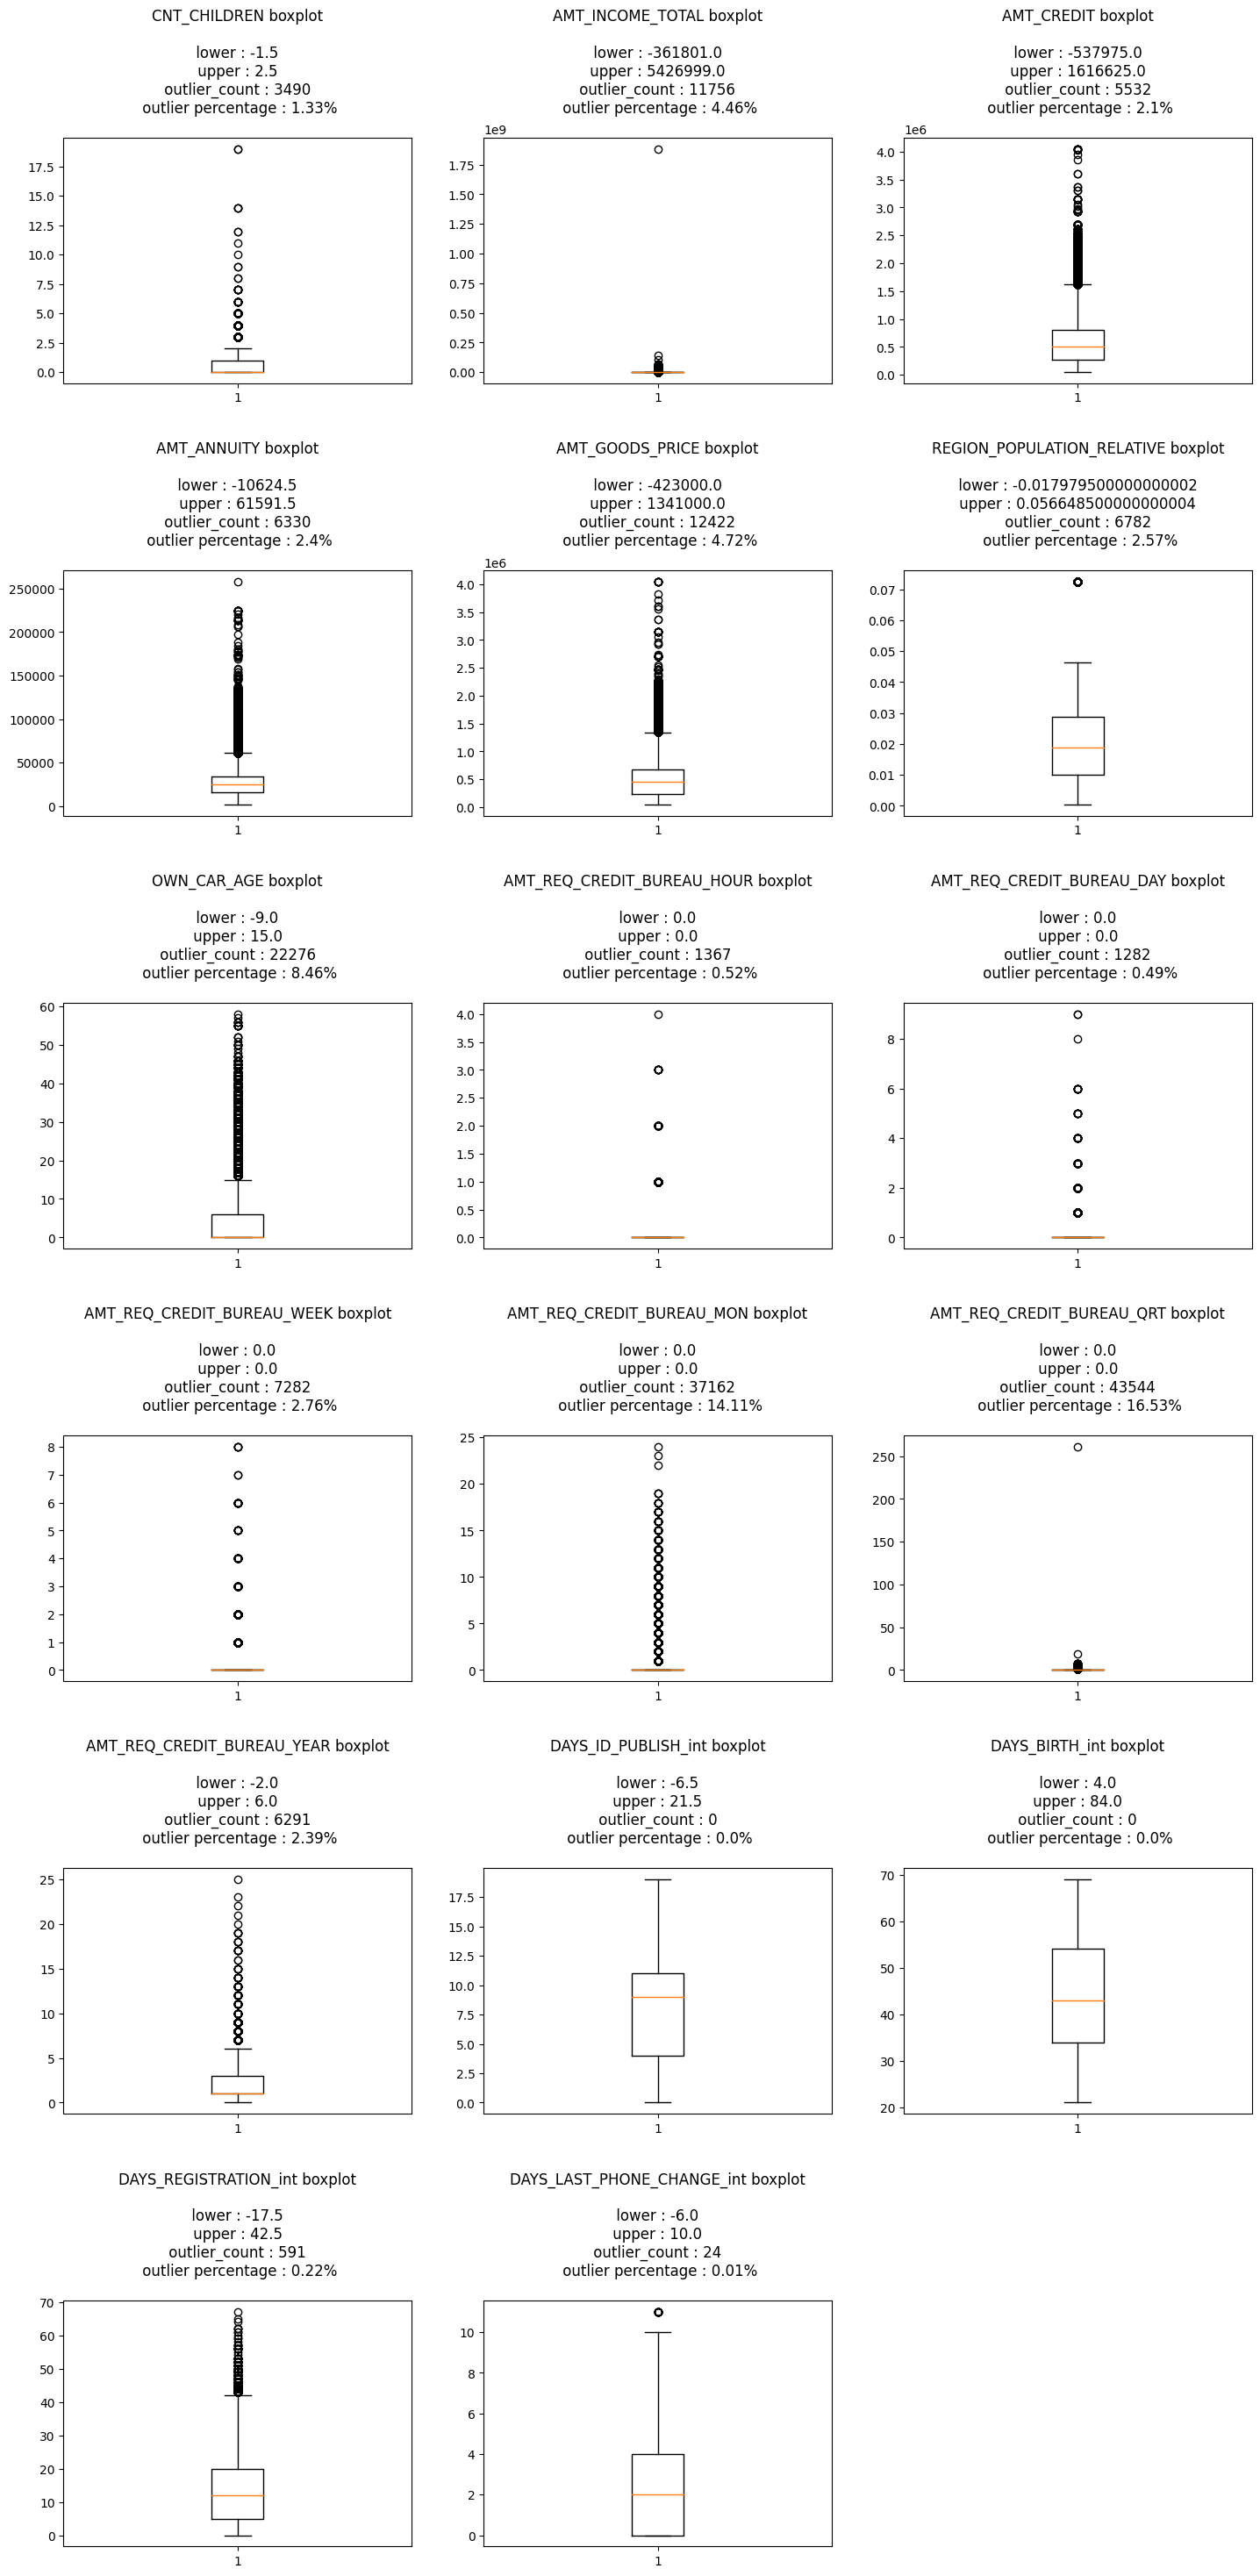

In [54]:
# 인코딩 안해도 되는 컬럼들
n_encoding_column= ["CNT_CHILDREN", "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE",
                    "OWN_CAR_AGE",'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                    'DAYS_ID_PUBLISH_int', 'DAYS_BIRTH_int', 'DAYS_REGISTRATION_int', 'DAYS_LAST_PHONE_CHANGE_int']

draw_boxplot(n_encoding_column,1.5)

In [55]:
import warnings
warnings.filterwarnings('ignore')

## Train / Test 각각 나눠서 수행

### 스케일링

#### 왜도 첨도 보고 스케일링할 컬럼명 파악

In [56]:
n_encoding_column= ["CNT_CHILDREN", "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE",
                    "OWN_CAR_AGE",'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                    'DAYS_ID_PUBLISH_int', 'DAYS_BIRTH_int', 'DAYS_REGISTRATION_int', 'DAYS_LAST_PHONE_CHANGE_int']

In [57]:
df_skew_kur = X_train[n_encoding_column]

In [58]:
df_skew_kur_test = X_test[n_encoding_column]

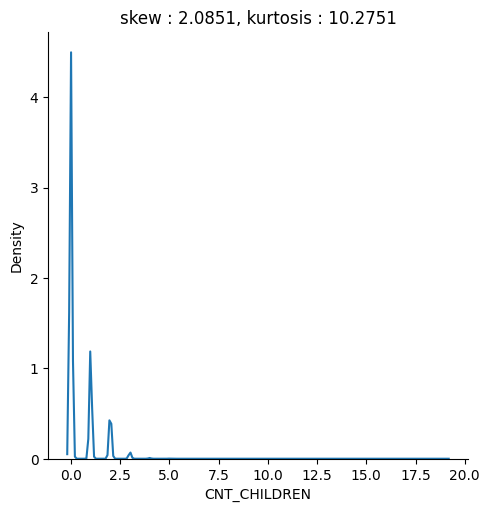

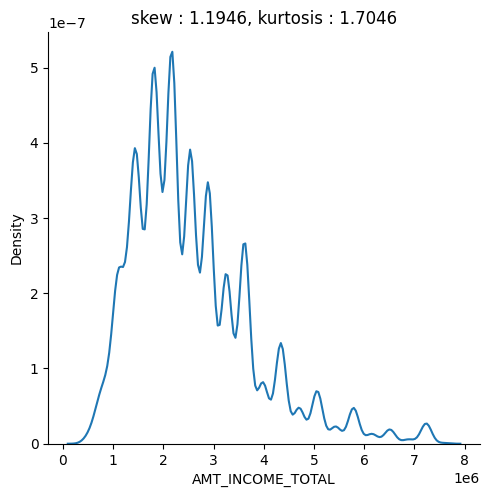

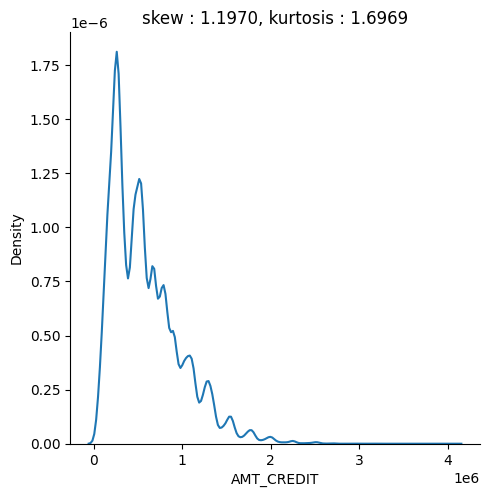

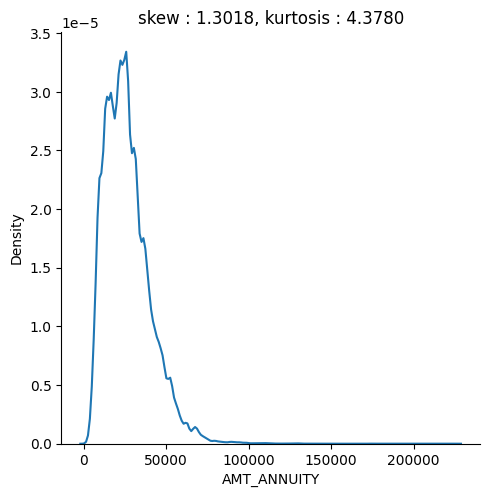

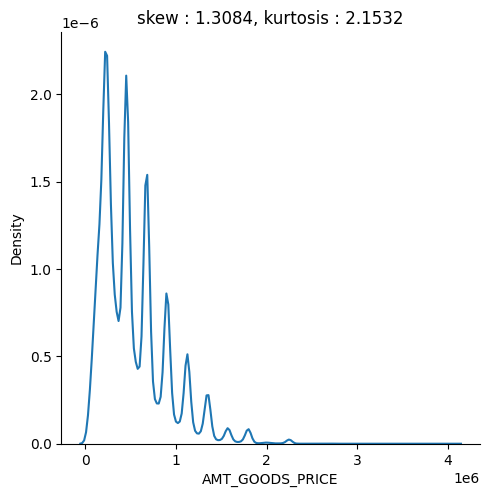

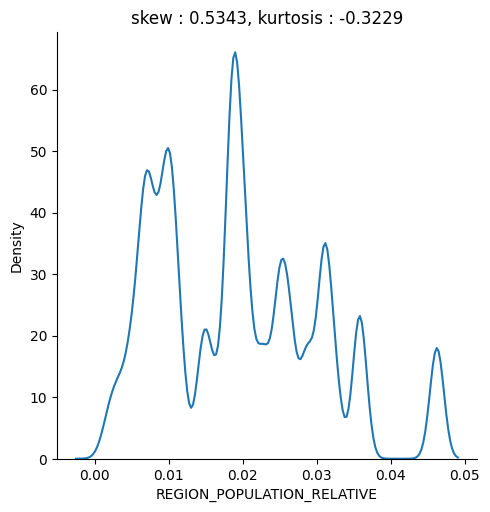

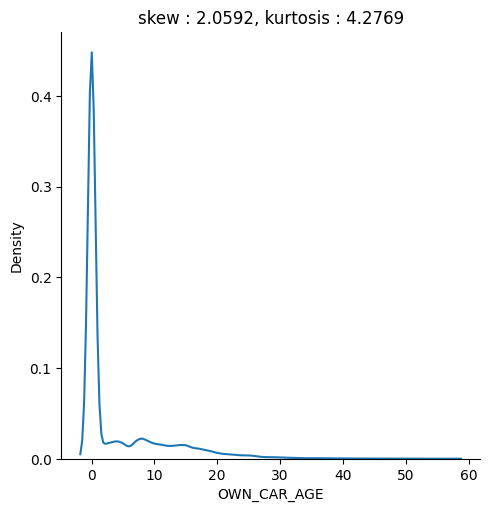

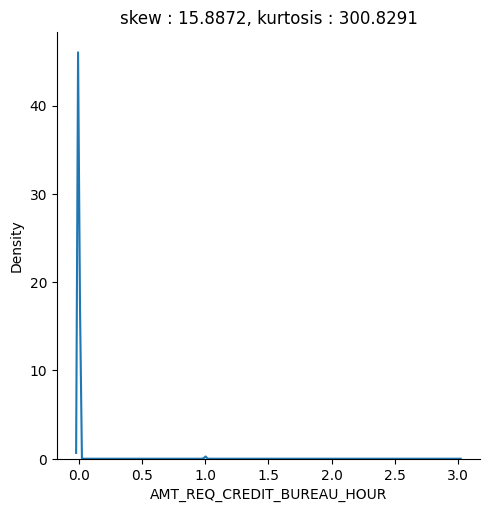

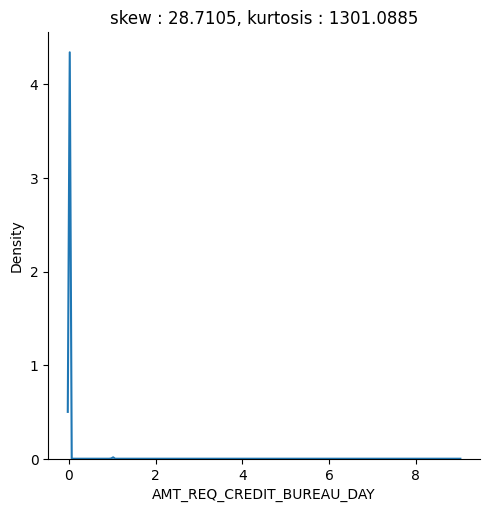

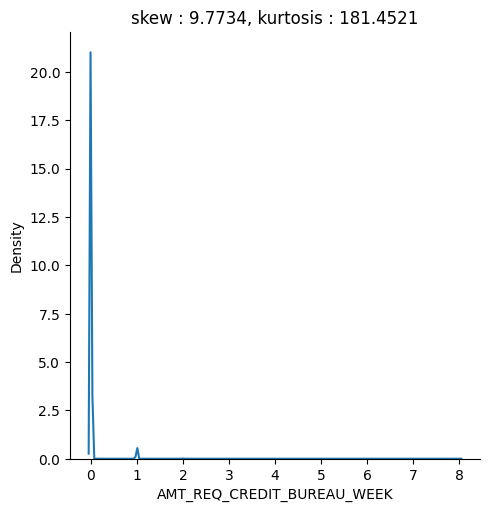

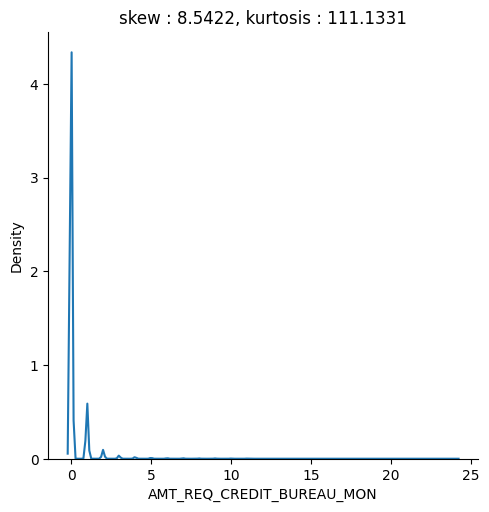

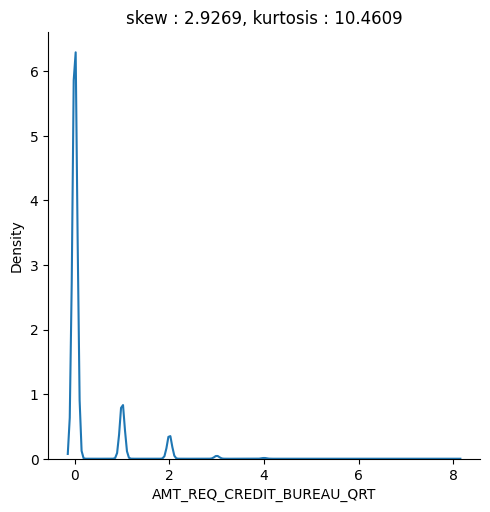

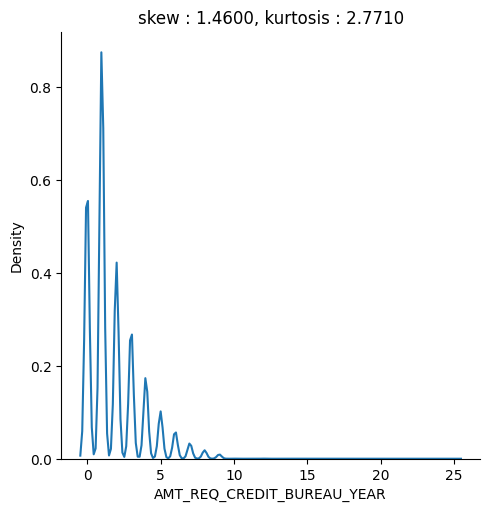

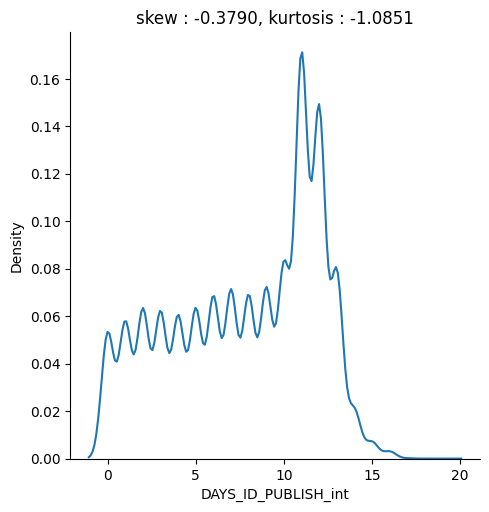

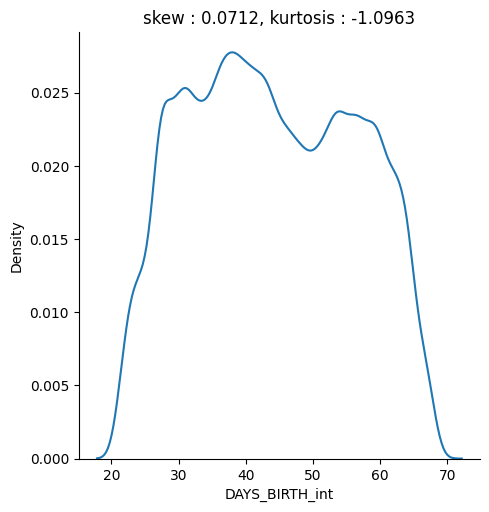

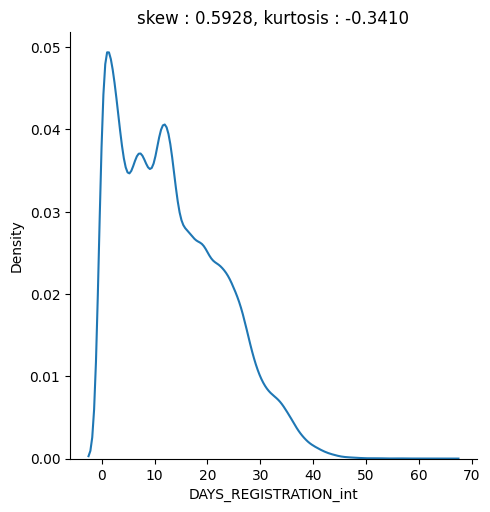

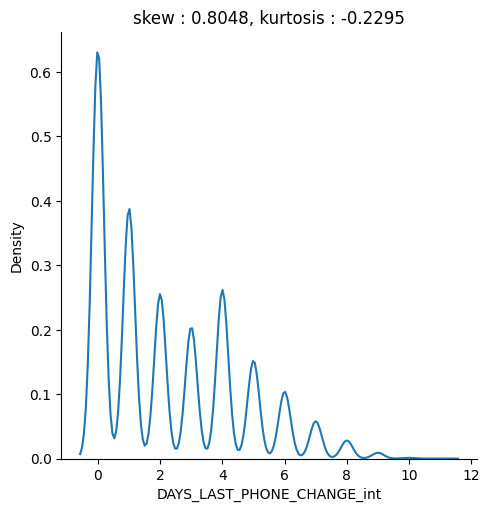

In [59]:
from scipy.stats import skew, kurtosis
import seaborn as sns

# 왜도
skew = skew(df_skew_kur)

# 첨도
kur = kurtosis(df_skew_kur, fisher=True)

for i,col in enumerate(df_skew_kur.columns):
    sns.displot(df_skew_kur[col], kind="kde").set(title=f"skew : {skew[i]:.4f}, kurtosis : {kur[i]:.4f}")
    # 'CNT_CHILDREN', 'AMT_ANNUITY', 'OWN_CAR_AGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'

#### 스케일링

#### 로그변환

In [60]:
log_tr = ['CNT_CHILDREN', 'AMT_ANNUITY', 'OWN_CAR_AGE', 
          'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
          'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

for col in log_tr:
  X_train[col] = np.log1p(X_train[col])
  X_test[col] = np.log1p(X_test[col])

X_train[['CNT_CHILDREN', 'AMT_ANNUITY', 'OWN_CAR_AGE', 
          'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
          'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

,CNT_CHILDREN,AMT_ANNUITY,OWN_CAR_AGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
58544,0.693147,10.148119,1.791759,0.0,0.0,0.0,0.0,0.0,1.098612
68740,0.000000,11.119898,2.564949,0.0,0.0,0.0,0.0,0.0,0.693147
303298,0.000000,9.111569,0.000000,0.0,0.0,0.0,0.0,0.0,1.098612
22050,0.000000,10.735418,2.197225,0.0,0.0,0.0,0.0,0.0,0.693147
126516,0.000000,10.664936,2.484907,0.0,0.0,0.0,0.0,0.0,1.098612
...,...,...,...,...,...,...,...,...,...
247564,0.000000,10.569764,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
246986,0.693147,10.403566,0.000000,0.0,0.0,0.0,0.0,0.0,1.386294
100751,0.000000,9.504501,1.098612,0.0,0.0,0.0,0.0,0.0,0.693147
143248,0.000000,10.738254,2.995732,0.0,0.0,0.0,0.0,0.0,0.000000


In [61]:
X_test[['CNT_CHILDREN', 'AMT_ANNUITY', 'OWN_CAR_AGE', 
          'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
          'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

,CNT_CHILDREN,AMT_ANNUITY,OWN_CAR_AGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
58467,0.000000,10.358489,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.098612
39080,0.000000,9.915959,0.000000,0.0,0.0,0.0,0.693147,0.000000,1.609438
56027,0.000000,10.256220,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.098612
218961,0.000000,9.544274,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.693147
106241,0.693147,10.200123,0.000000,0.0,0.0,0.0,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
170923,0.000000,9.406647,0.000000,0.0,0.0,0.0,0.000000,0.693147,0.000000
93028,0.693147,10.233349,2.302585,0.0,0.0,0.0,0.000000,0.000000,0.693147
198263,0.693147,10.177970,2.833213,0.0,0.0,0.0,0.000000,0.000000,0.000000
142479,0.000000,9.482807,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.098612


In [62]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 인코딩 안해도 되는 컬럼들
n_encoding_column= ["CNT_CHILDREN", "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE",
                    "OWN_CAR_AGE",'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                    'DAYS_ID_PUBLISH_int', 'DAYS_BIRTH_int', 'DAYS_REGISTRATION_int', 'DAYS_LAST_PHONE_CHANGE_int']

df_scailing = X_train[n_encoding_column]

df_scailing = StandardScaler().fit_transform(df_scailing)

df_scailing = pd.DataFrame(df_scailing,columns=n_encoding_column) ## Train Data 이름 : df_scailing

In [63]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 인코딩 안해도 되는 컬럼들
n_encoding_column= ["CNT_CHILDREN", "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE",
                    "OWN_CAR_AGE",'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                    'DAYS_ID_PUBLISH_int', 'DAYS_BIRTH_int', 'DAYS_REGISTRATION_int', 'DAYS_LAST_PHONE_CHANGE_int']

df_scailing_test = X_test[n_encoding_column]

df_scailing_test = StandardScaler().fit_transform(df_scailing_test)

df_scailing_test = pd.DataFrame(df_scailing_test,columns=n_encoding_column)

#### 왜도 첨도 확인

In [64]:
from scipy.stats import skew, kurtosis

# 왜도
skew = skew(df_scailing)

# 첨도
kur = kurtosis(df_scailing, fisher=True)

스케일링 한 후 분포 그리기

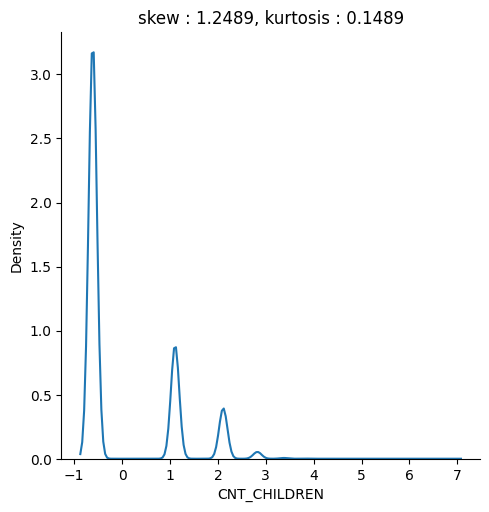

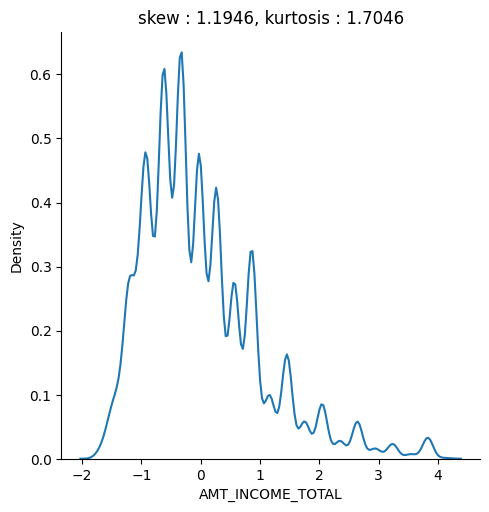

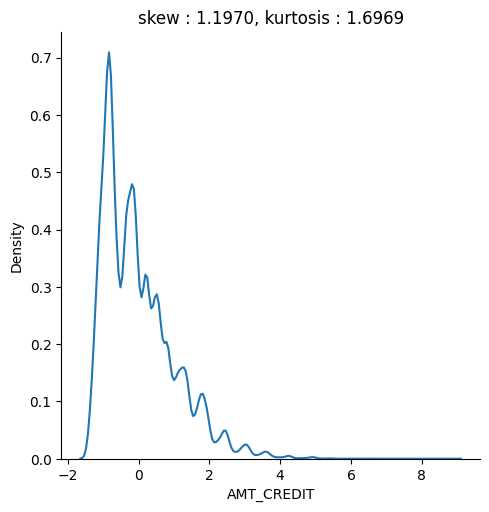

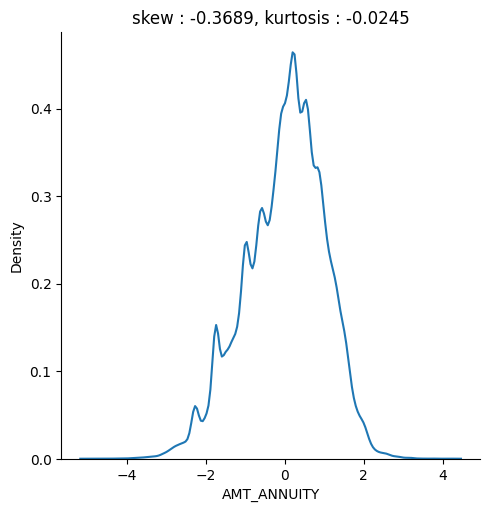

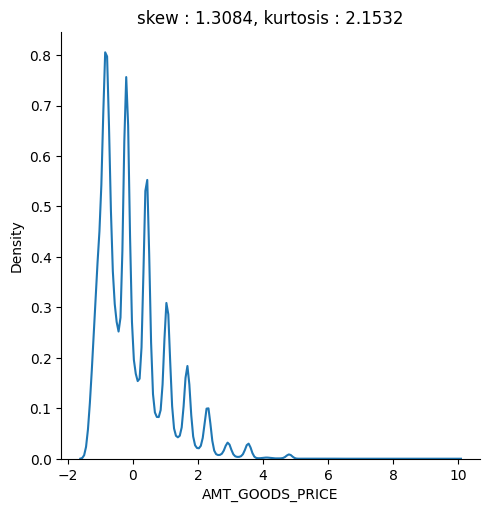

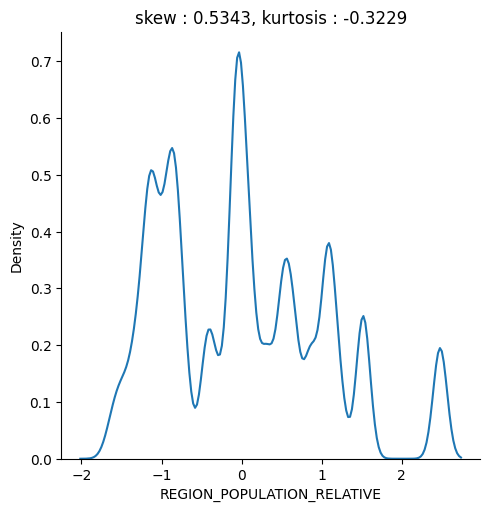

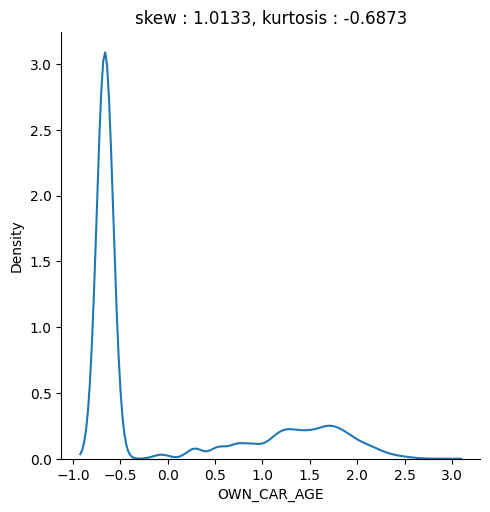

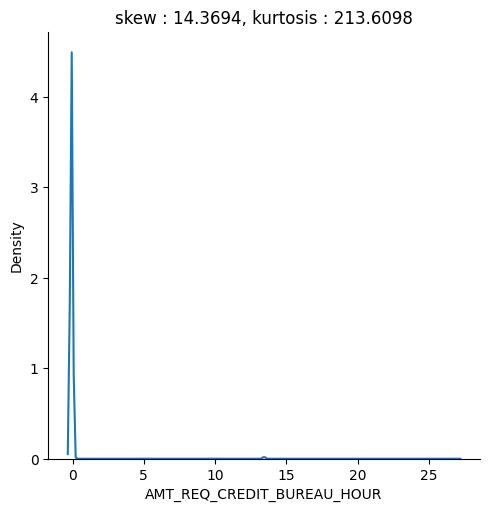

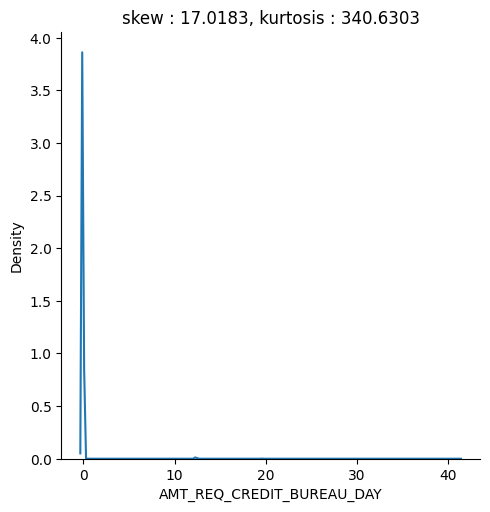

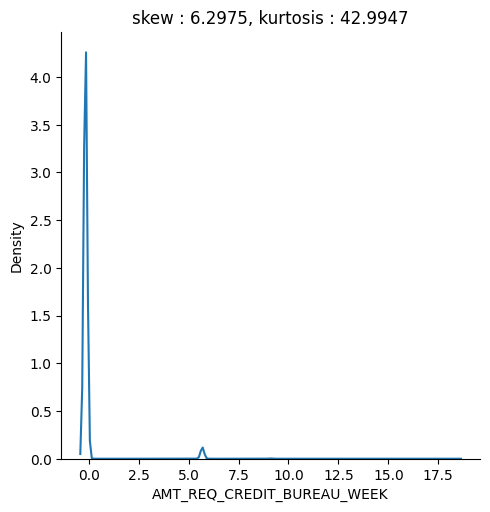

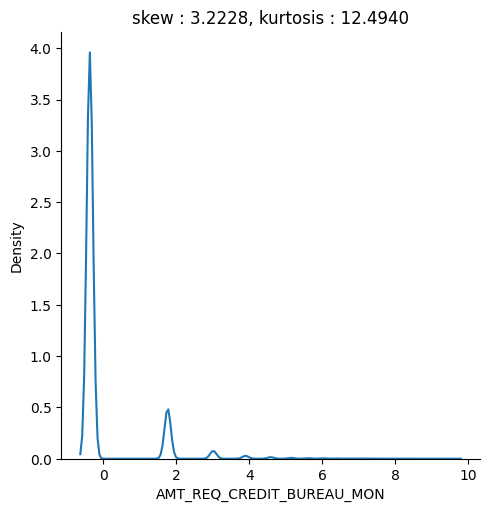

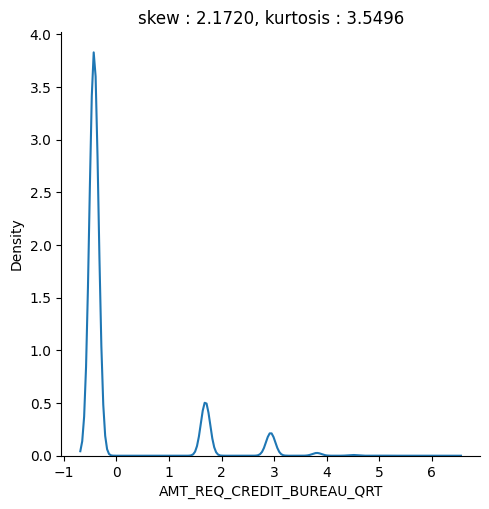

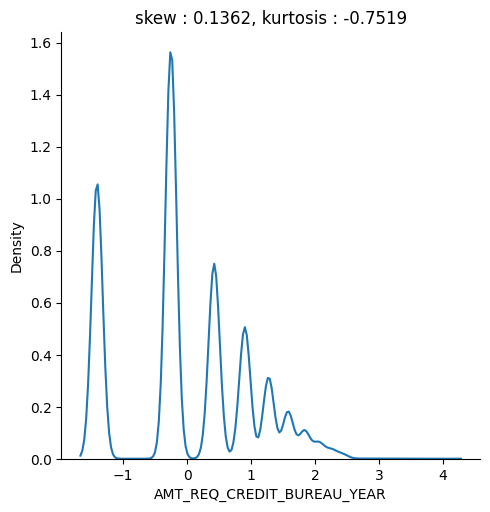

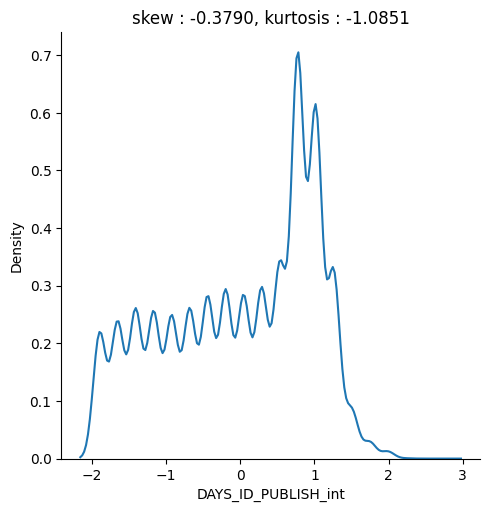

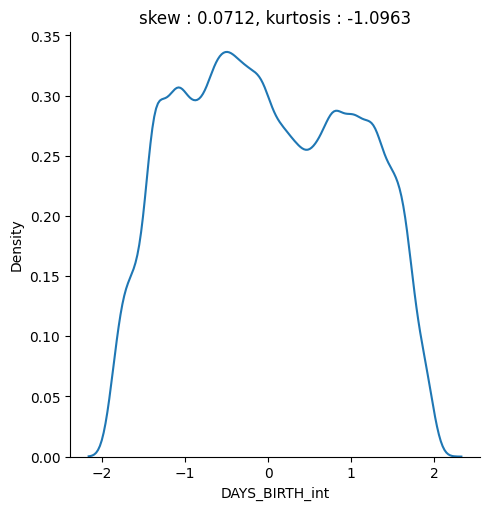

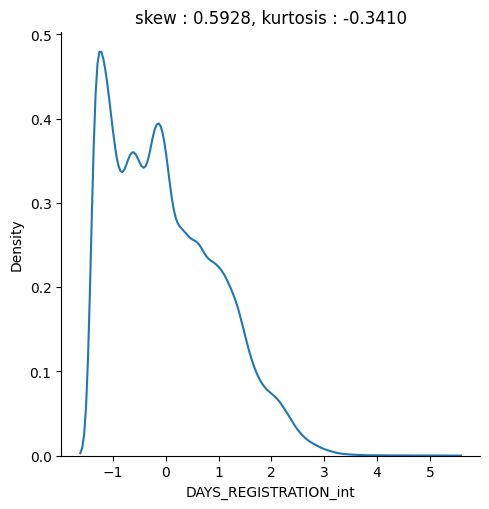

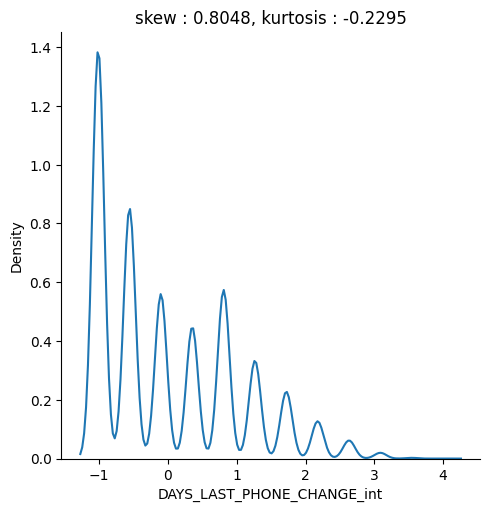

In [65]:
for i,col in enumerate(df_scailing.columns):
    sns.displot(df_scailing[col], kind="kde").set(title=f"skew : {skew[i]:.4f}, kurtosis : {kur[i]:.4f}")
# 첨도가 3 넘는 것들: CNT_CHILDREN , AMT_ANNUITY, OWN_CAR_AGE, AMT_REQ_CREDIT_BURAU_HOUR (엄청 심각), AMT_REQ_CREDIT_BURAU_DAY (엄청 심각),AMT_REQ_CREDIT_BURAU_WEEK (엄청 심각),
# AMT_REQ_CREDIT_BURAU_MON (엄청 심각), AMT_REQ_CREDIT_BURAU_QRT, 
# 첨도가 음수? REGION_POPULATION_RELATIVE, DAYS_ID_PUBLISH_int, DAYS_BIRTH_int, DAYS_REGISTRATION_int, DAYS_LAST_PHONE_CHANGE_int
# 첨도가 음수인 경우에는 데이터의 분포가 정규분포보다 더 완만함을 의미합니다.
# 일반적으로 왜도의 절대값이 2미만인 경우 '치우쳐저 있지 않다’라고 할 수 있습니다

### 다중공선성 확인

In [66]:
# 인코딩 안해도 되는 컬럼들
n_encoding_column= ["CNT_CHILDREN", "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE",
                    "OWN_CAR_AGE",'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                    'DAYS_ID_PUBLISH_int', 'DAYS_BIRTH_int', 'DAYS_REGISTRATION_int', 'DAYS_LAST_PHONE_CHANGE_int']

<Axes: >

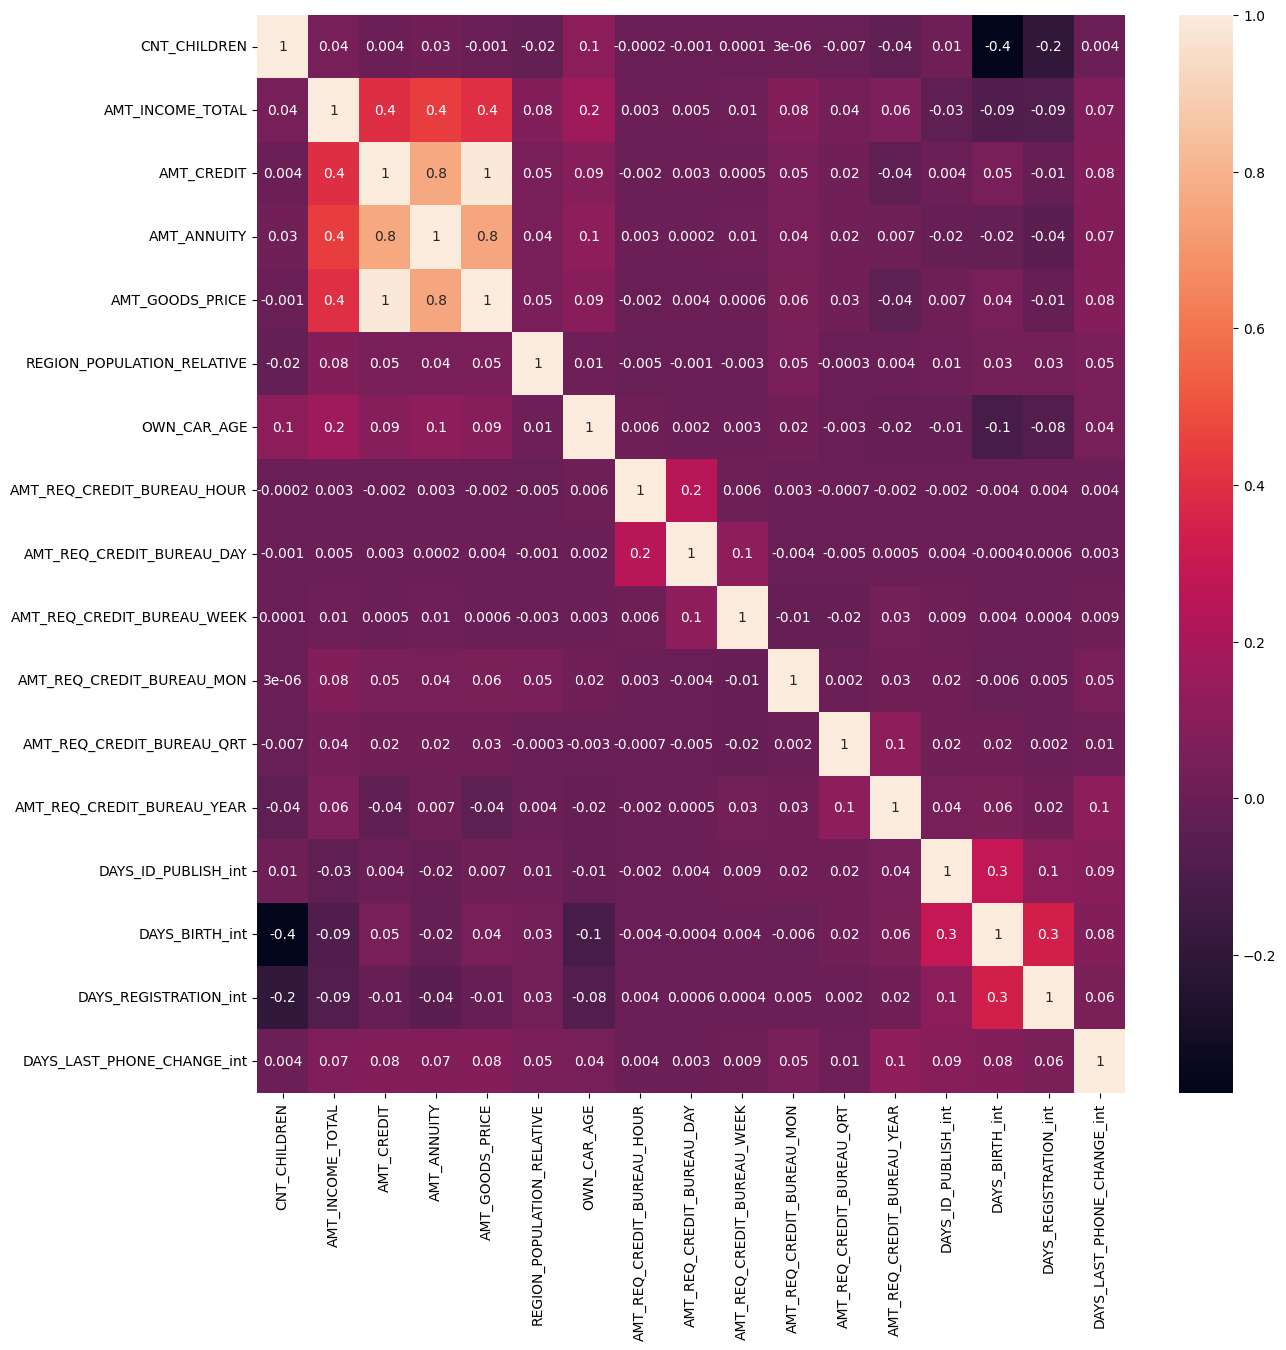

In [67]:
corr = X_train[n_encoding_column].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

#### 히트맵 확인 후 삭제할 컬럼 - Train / Test 모두 수행
> AMT_ANNUITY  
> AMT_GOODS_PRICE  


In [68]:
df_scailing.drop(['AMT_ANNUITY', 'AMT_GOODS_PRICE'], axis =1, inplace = True)

In [69]:
df_scailing_test.drop(['AMT_ANNUITY', 'AMT_GOODS_PRICE'], axis =1, inplace = True)

In [70]:
df_scailing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203604 entries, 0 to 203603
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CNT_CHILDREN                203604 non-null  float64
 1   AMT_INCOME_TOTAL            203604 non-null  float64
 2   AMT_CREDIT                  203604 non-null  float64
 3   REGION_POPULATION_RELATIVE  203604 non-null  float64
 4   OWN_CAR_AGE                 203604 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_HOUR  203604 non-null  float64
 6   AMT_REQ_CREDIT_BUREAU_DAY   203604 non-null  float64
 7   AMT_REQ_CREDIT_BUREAU_WEEK  203604 non-null  float64
 8   AMT_REQ_CREDIT_BUREAU_MON   203604 non-null  float64
 9   AMT_REQ_CREDIT_BUREAU_QRT   203604 non-null  float64
 10  AMT_REQ_CREDIT_BUREAU_YEAR  203604 non-null  float64
 11  DAYS_ID_PUBLISH_int         203604 non-null  float64
 12  DAYS_BIRTH_int              203604 non-null  float64
 13  DAYS_REGISTRAT

In [71]:
df_scailing_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50939 entries, 0 to 50938
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CNT_CHILDREN                50939 non-null  float64
 1   AMT_INCOME_TOTAL            50939 non-null  float64
 2   AMT_CREDIT                  50939 non-null  float64
 3   REGION_POPULATION_RELATIVE  50939 non-null  float64
 4   OWN_CAR_AGE                 50939 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_HOUR  50939 non-null  float64
 6   AMT_REQ_CREDIT_BUREAU_DAY   50939 non-null  float64
 7   AMT_REQ_CREDIT_BUREAU_WEEK  50939 non-null  float64
 8   AMT_REQ_CREDIT_BUREAU_MON   50939 non-null  float64
 9   AMT_REQ_CREDIT_BUREAU_QRT   50939 non-null  float64
 10  AMT_REQ_CREDIT_BUREAU_YEAR  50939 non-null  float64
 11  DAYS_ID_PUBLISH_int         50939 non-null  float64
 12  DAYS_BIRTH_int              50939 non-null  float64
 13  DAYS_REGISTRATION_int       509

### 데이터프레임에서 csv 파일로 저장

In [72]:
df_scailing.to_csv("./train_data.csv",index=False)
df_scailing_test.to_csv("./test_data.csv",index=False)